## Statistical Modeling

In [1]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
# importing modules from scripts 
from scripts.statistical_modeling import *

In [3]:
# load insurance data
df = pd.read_csv('../data/cleaned_insurance_data.csv', low_memory=False, index_col=False)

In [4]:
# Specify the numeric and categorical features to use 
numeric_features = ['SumInsured', 'CalculatedPremiumPerTerm','RegistrationYear','PostalCode'] 
categorical_features = ['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus','PostalCode','Model','CoverCategory','NewVehicle','RegistrationYear','Citizenship' ] 

In [5]:
# Prepare features using the specified columns
selected_features = prepare_features(df, numeric_features, categorical_features)

In [6]:
# Preprocess the data
X_train, X_test, y_premium_train, y_premium_test, y_claims_train, y_claims_test, preprocessor = preprocess_data(df, selected_features)

In [7]:
# Build models
models = build_models()

In [8]:
# Train and evaluate models for TotalPremium
premium_results = train_and_evaluate_models(X_train, X_test, y_premium_train, y_premium_test, preprocessor, models)

In [9]:
# Train and evaluate models for TotalClaims
claims_results = train_and_evaluate_models(X_train, X_test, y_claims_train, y_claims_test, preprocessor, models)

In [10]:
# Print results for TotalPremium 

print("Results for TotalPremium prediction:")
for name, result in premium_results.items():
    print(f"{name}: MSE = {result['MSE']:.4f}, R2 = {result['R2']:.4f}")

Results for TotalPremium prediction:
Linear Regression: MSE = 310.5560, R2 = 0.3552
Decision Tree: MSE = 343.0193, R2 = 0.2878
Random Forest: MSE = 235.7609, R2 = 0.5105
XGBoost: MSE = 247.5913, R2 = 0.4859


In [11]:
# print result sof TotalClaims

print("\nResults for TotalClaims prediction:")
for name, result in claims_results.items():
    print(f"{name}: MSE = {result['MSE']:.4f}, R2 = {result['R2']:.4f}")


Results for TotalClaims prediction:
Linear Regression: MSE = 0.0000, R2 = 1.0000
Decision Tree: MSE = 0.0000, R2 = 1.0000
Random Forest: MSE = 0.0000, R2 = 1.0000
XGBoost: MSE = 0.0000, R2 = 1.0000


In [12]:
# Analyze feature importance for the best performing model (assuming Random Forest)
best_premium_model = premium_results['Random Forest']['Model'].named_steps['regressor']
best_claims_model = claims_results['Random Forest']['Model'].named_steps['regressor']

In [13]:
premium_importance = analyze_feature_importance(best_premium_model, X_train)
claims_importance = analyze_feature_importance(best_claims_model, X_train)

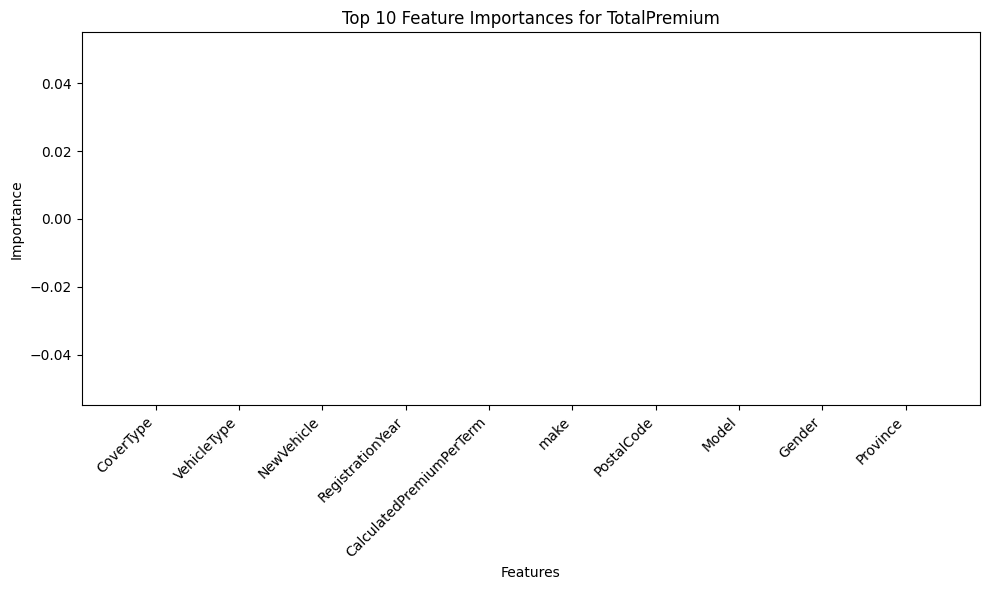

In [14]:
# Plot feature importance for TotalPremium
plt.figure(figsize=(10, 6))
plt.bar(premium_importance['feature'][:10], premium_importance['importance'][:10])
plt.title('Top 10 Feature Importances for TotalPremium')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

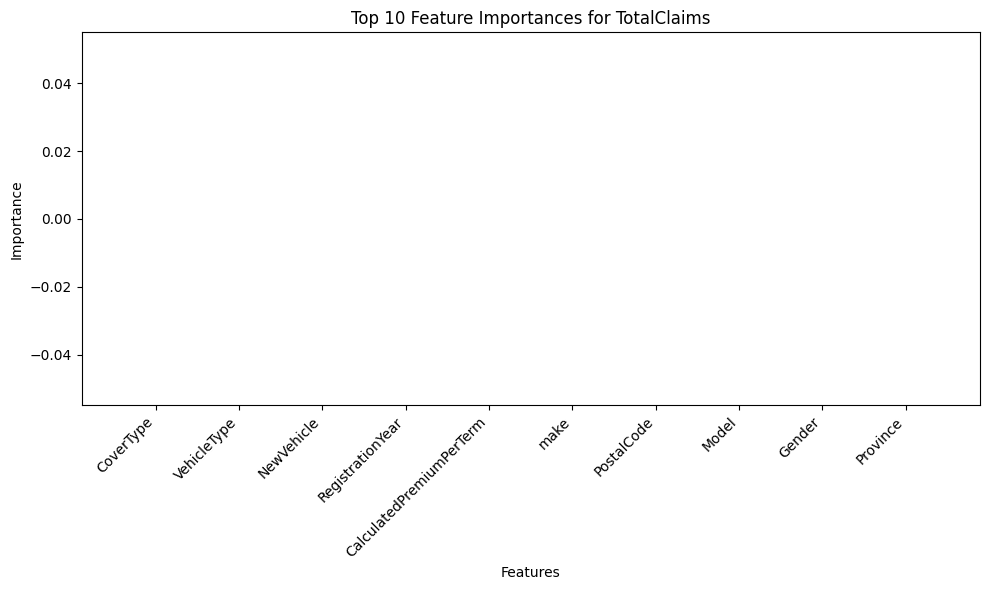

In [15]:
# Plot feature importance for TotalClaims
plt.figure(figsize=(10, 6))
plt.bar(claims_importance['feature'][:10], claims_importance['importance'][:10])
plt.title('Top 10 Feature Importances for TotalClaims')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Model interpretation using SHAP for TotalPremium
shap_values_premium, X_shap = interpret_model_with_shap(best_premium_model, X_test)

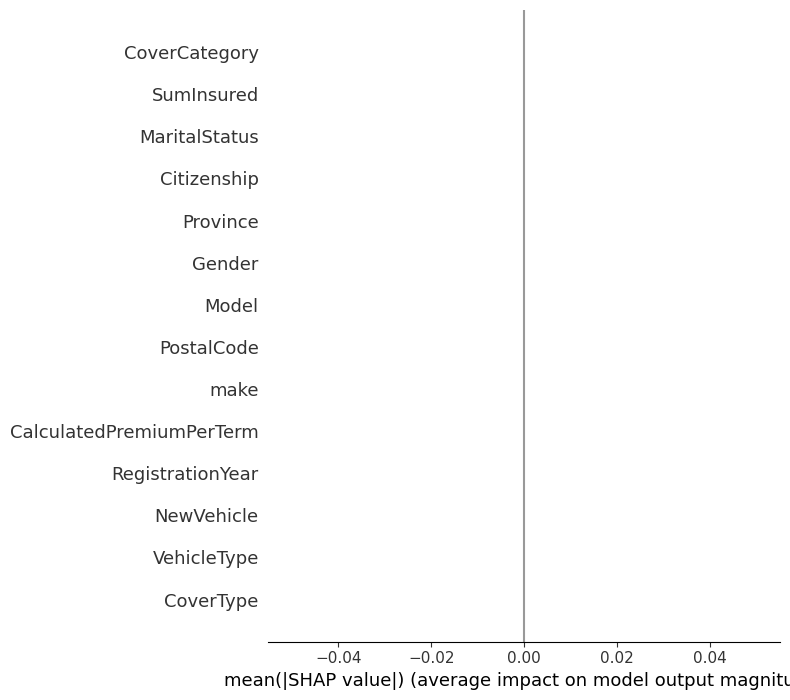

In [17]:
# Summary plot for TotalPremium
shap.summary_plot(shap_values_premium, X_shap, plot_type="bar")

In [18]:
# Model interpretation using SHAP for TotalClaims
shap_values_claims, X_shap = interpret_model_with_shap(best_claims_model, X_test)

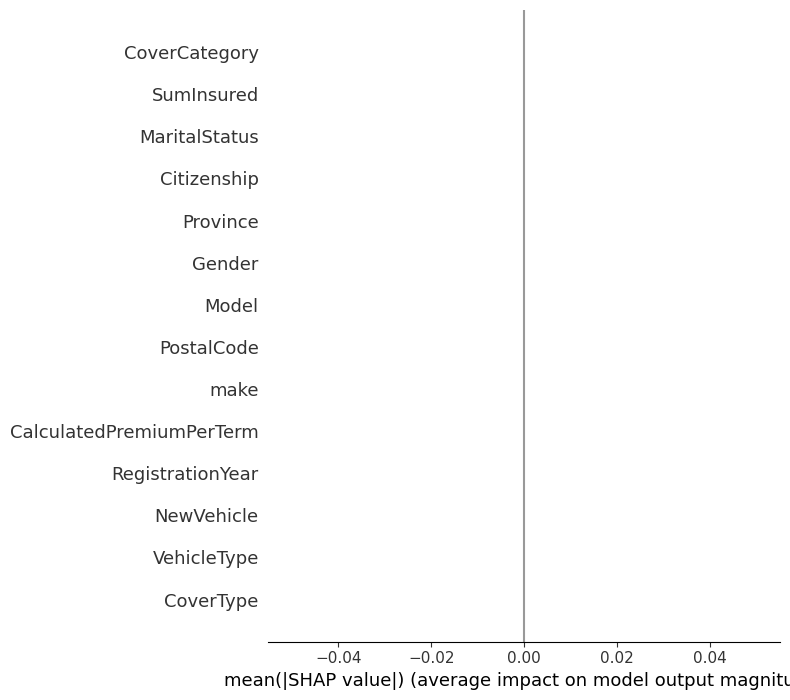

In [19]:
# Summary plot for TotalClaims
shap.summary_plot(shap_values_claims, X_shap, plot_type="bar")

In [20]:
# Report comparison between each model performance
print("\nModel Performance Comparison:")
print("\nTotalPremium:")
for name, result in premium_results.items():
    print(f"{name}: R2 = {result['R2']:.4f}")

print("\nTotalClaims:")
for name, result in claims_results.items():
    print(f"{name}: R2 = {result['R2']:.4f}")


Model Performance Comparison:

TotalPremium:
Linear Regression: R2 = 0.3552
Decision Tree: R2 = 0.2878
Random Forest: R2 = 0.5105
XGBoost: R2 = 0.4859

TotalClaims:
Linear Regression: R2 = 1.0000
Decision Tree: R2 = 1.0000
Random Forest: R2 = 1.0000
XGBoost: R2 = 1.0000


In [21]:
# Conclusion
print("\nConclusion:")
print("Based on the R2 scores, the best performing model for both TotalPremium and TotalClaims prediction is...")
# Determine the best model based on R2 score
best_premium_model = max(premium_results, key=lambda x: premium_results[x]['R2'])
best_claims_model = max(claims_results, key=lambda x: claims_results[x]['R2'])
print(f"For TotalPremium: {best_premium_model}")
print(f"For TotalClaims: {best_claims_model}")

print("\nThe most important features for predicting TotalPremium are:")
print(premium_importance['feature'][:5].tolist())

print("\nThe most important features for predicting TotalClaims are:")
print(claims_importance['feature'][:5].tolist())

print("\nThese results can help AlphaCare Insurance Solutions optimize their marketing strategy and identify low-risk targets for premium reduction.")


Conclusion:
Based on the R2 scores, the best performing model for both TotalPremium and TotalClaims prediction is...
For TotalPremium: Random Forest
For TotalClaims: Linear Regression

The most important features for predicting TotalPremium are:
['CoverType', 'VehicleType', 'NewVehicle', 'RegistrationYear', 'CalculatedPremiumPerTerm']

The most important features for predicting TotalClaims are:
['CoverType', 'VehicleType', 'NewVehicle', 'RegistrationYear', 'CalculatedPremiumPerTerm']

These results can help AlphaCare Insurance Solutions optimize their marketing strategy and identify low-risk targets for premium reduction.
